**Prior study (Codes in Week 5 folder）**:

Please use this page as companion to understand the newsgroup data set.
[Data Set](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)

You will also need to be familiar with some text processing commands：

[Tf-idf](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html)

[countvectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)


In [16]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

# **Steps outline**
1. Download your data set by inputting your student number.
2. Process your text data, extract features, convert them into vectors
3. Modeling, train models on the data set (select model, tune different parameters)
4. Process your text data, extract features, convert them into vectors
5. Analysis and discussions

# Step 1: Load Dataset


Prior study (Codes in Week 5 folder）:

Please use this page as companion to understand  [**Newsgroup data set**](https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html)


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='train',  categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test',  categories=categories, shuffle=True, random_state=42)

**This is how to identify which data set to use (Please copy  the following information in report front   page).**

In [18]:
index=input('type your student number?')

type your student number?30021323


In [19]:
x=divmod(int(index),4)
yourdata1=x[1]
y=divmod(int(index),3)
yourdata2=y[1]

print('This is your data set index ----> (', x[1], y[1], ')' )

This is your data set index ----> ( 3 2 )


In [20]:
data1= twenty_train.target_names[x[1]]
data2= twenty_train.target_names[y[1]]
categories1=[data1,data2]
print(categories1)

['soc.religion.christian', 'sci.med']


**Your front page data information Ends here**

# Step 2 Process your text data, extract features

# 2.1 An example of preprocessing

**An example is provided.**

Please pay attention  comment #replace ..., which means you need to change example text to your data set.
Use google search for usages of  "nltk tokenizer ”, "nltk stemmer", "nltk pos tag" to help your report writing.

In [ ]:
# write your own NLP precessing examples with  preprocessing techniques.


dataset=twenty_train.data[2]
dataset=twenty_train.data[3]
print(dataset)
# please   replace 1 in bracket to other data sample and explore the code

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')


From: s0612596@let.rug.nl (M.M. Zwart)
Subject: catholic church poland
Organization: Faculteit der Letteren, Rijksuniversiteit Groningen, NL
Lines: 10

Hello,

I'm writing a paper on the role of the catholic church in Poland after 1989. 
Can anyone tell me more about this, or fill me in on recent books/articles(
in english, german or french). Most important for me is the role of the 
church concerning the abortion-law, religious education at schools,
birth-control and the relation church-state(government). Thanx,

                                                 Masja,
"M.M.Zwart"<s0612596@let.rug.nl>



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:

# tokenize: search: nltk tokenize
example = "This is an example sentence."

from nltk.tokenize import word_tokenize
example_tokenize =word_tokenize(dataset)
#example_tokenize= word_tokenize(dataset) # replace example in bracket to dataset.
print("-------------------------tokenize:")
print(example_tokenize)

-------------------------tokenize:
['From', ':', 's0612596', '@', 'let.rug.nl', '(', 'M.M', '.', 'Zwart', ')', 'Subject', ':', 'catholic', 'church', 'poland', 'Organization', ':', 'Faculteit', 'der', 'Letteren', ',', 'Rijksuniversiteit', 'Groningen', ',', 'NL', 'Lines', ':', '10', 'Hello', ',', 'I', "'m", 'writing', 'a', 'paper', 'on', 'the', 'role', 'of', 'the', 'catholic', 'church', 'in', 'Poland', 'after', '1989', '.', 'Can', 'anyone', 'tell', 'me', 'more', 'about', 'this', ',', 'or', 'fill', 'me', 'in', 'on', 'recent', 'books/articles', '(', 'in', 'english', ',', 'german', 'or', 'french', ')', '.', 'Most', 'important', 'for', 'me', 'is', 'the', 'role', 'of', 'the', 'church', 'concerning', 'the', 'abortion-law', ',', 'religious', 'education', 'at', 'schools', ',', 'birth-control', 'and', 'the', 'relation', 'church-state', '(', 'government', ')', '.', 'Thanx', ',', 'Masja', ',', "''", 'M.M.Zwart', "''", '<', 's0612596', '@', 'let.rug.nl', '>']


In [ ]:
# stemmer: search: nltk stemmer
stemmer = nltk.stem.PorterStemmer()
example_stem = stemmer.stem(example)  # replace .....
print("-------------------------stem:")
print(example_stem)

-------------------------stem:
this is an example sentence.


In [ ]:
# pos_taging: search: nltk pos tagging example
example_posTag=nltk.pos_tag(example_tokenize)
print("-------------------------pos_taging:")
print(example_posTag)

-------------------------pos_taging:
[('From', 'IN'), (':', ':'), ('s0612596', 'NN'), ('@', 'NN'), ('let.rug.nl', 'NN'), ('(', '('), ('M.M', 'NNP'), ('.', '.'), ('Zwart', 'NNP'), (')', ')'), ('Subject', 'NN'), (':', ':'), ('catholic', 'JJ'), ('church', 'NN'), ('poland', 'NN'), ('Organization', 'NNP'), (':', ':'), ('Faculteit', 'NNP'), ('der', 'NN'), ('Letteren', 'NNP'), (',', ','), ('Rijksuniversiteit', 'NNP'), ('Groningen', 'NNP'), (',', ','), ('NL', 'NNP'), ('Lines', 'NNPS'), (':', ':'), ('10', 'CD'), ('Hello', 'NNP'), (',', ','), ('I', 'PRP'), ("'m", 'VBP'), ('writing', 'VBG'), ('a', 'DT'), ('paper', 'NN'), ('on', 'IN'), ('the', 'DT'), ('role', 'NN'), ('of', 'IN'), ('the', 'DT'), ('catholic', 'JJ'), ('church', 'NN'), ('in', 'IN'), ('Poland', 'NNP'), ('after', 'IN'), ('1989', 'CD'), ('.', '.'), ('Can', 'MD'), ('anyone', 'NN'), ('tell', 'VB'), ('me', 'PRP'), ('more', 'JJR'), ('about', 'IN'), ('this', 'DT'), (',', ','), ('or', 'CC'), ('fill', 'VB'), ('me', 'PRP'), ('in', 'IN'), ('on', 

In [ ]:
 # consituency parsing, chunking
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(example_posTag)
print(result)

(S
  From/IN
  :/:
  (NP s0612596/NN)
  (NP @/NN)
  (NP let.rug.nl/NN)
  (/(
  M.M/NNP
  ./.
  Zwart/NNP
  )/)
  (NP Subject/NN)
  :/:
  (NP catholic/JJ church/NN)
  (NP poland/NN)
  Organization/NNP
  :/:
  Faculteit/NNP
  (NP der/NN)
  Letteren/NNP
  ,/,
  Rijksuniversiteit/NNP
  Groningen/NNP
  ,/,
  NL/NNP
  Lines/NNPS
  :/:
  10/CD
  Hello/NNP
  ,/,
  I/PRP
  'm/VBP
  writing/VBG
  (NP a/DT paper/NN)
  on/IN
  (NP the/DT role/NN)
  of/IN
  (NP the/DT catholic/JJ church/NN)
  in/IN
  Poland/NNP
  after/IN
  1989/CD
  ./.
  Can/MD
  (NP anyone/NN)
  tell/VB
  me/PRP
  more/JJR
  about/IN
  this/DT
  ,/,
  or/CC
  fill/VB
  me/PRP
  in/IN
  on/IN
  recent/JJ
  books/articles/NNS
  (/(
  in/IN
  (NP english/NN)
  ,/,
  german/JJ
  or/CC
  french/JJ
  )/)
  ./.
  Most/RBS
  important/JJ
  for/IN
  me/PRP
  is/VBZ
  (NP the/DT role/NN)
  of/IN
  (NP the/DT church/NN)
  concerning/VBG
  (NP the/DT abortion-law/NN)
  ,/,
  (NP religious/JJ education/NN)
  at/IN
  schools/NNS
  ,/,
  (NP b

#2.2 NLP Preprocesssing

**Some preprocessing are provided for convenience. Please include why NLP preprocessing is in your report. Explain what techniques have been experimented in your report.**

In [21]:
import nltk
import re
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import LogisticRegression
from nltk.tokenize import sent_tokenize, word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from tqdm import tqdm
from nltk.corpus import stopwords
stopwordEn = stopwords.words('english')
from nltk.corpus import wordnet
nltk.download('wordnet')
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

def lemmaWord(word):
    lemma = wordnet.morphy(word)
    if lemma is not None:
        return lemma
    else:
        return word

def stemWord(word):
    stem = stemmer.stem(word)
    if stem is not None:
        return stem
    else:
        return word

def processText(text,lemma=False, gram=1, rmStop=True): # default remove stop words
    text = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b|@\w+|#', '', text, flags=re.MULTILINE) #delete URL, #hashtag# , and @xxx
    tokens = word_tokenize(text)
    whitelist = ["n't", "not", "no"]
    new_tokens = []
    stoplist = stopwordEn if rmStop else []
    for i in tokens:
      i = i.lower()
      if i.isalpha() and (i not in stoplist or i in whitelist):  #i not in ['.',',',';']  and (...)
        if lemma: i = lemmaWord(i)
        new_tokens.append(i)
    del tokens
    # tokens = [lemmaWord(i.lower()) if lemma else i.lower() for i in tokens if (i.lower() not in stoplist or i.lower() in whitelist) and i.isalpha()]
    if gram<=1:
        return new_tokens
    else:
        return [' '.join(ngram) for ngram in nltk.ngrams(new_tokens, gram)] # altered for N-grams
        #return [' '.join(i) for i in nltk.ngrams(new_tokens, gram)]



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [33]:
def getTags(text):
  token = word_tokenize(text)
  token = [l.lower() for l in token]
  train_tags = nltk.pos_tag(token)
  return [i[1] for i in train_tags]


In [35]:
#processed_text_bigrams = processText(dataset[3], lemma=False, gram=2, rmStop=True)  # for the third document
#processed_text_bigrams = processText(dataset[2], lemma=False, gram=2, rmStop=True)  # for the second document
#process the third and second documents,individually and obtain bigrams from each doc



# The above assumes that your processText function is designed to work with CountVectorizer
# and returns a list of tokens.

def processText(text, lemma=False, gram=1, rmStop=True):
    # Your existing preprocessing code (such as lowercasing, removing special characters, etc.)
    # ...

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    if rmStop:
        stopwords_list = stopwords.words('english')
        tokens = [token for token in tokens if token.lower() not in stopwords_list]

    # Apply lemmatization or stemming if needed
    if lemma:
        # Apply lemmatization
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    else:
        # Or apply stemming
        stemmer = SnowballStemmer('english')
        tokens = [stemmer.stem(token) for token in tokens]

    # Generate n-grams if required
    if gram > 1:
        # Create bigrams from the tokens and join them as a string
        bigrams = [' '.join(pair) for pair in ngrams(tokens, gram)]
        return ' '.join(bigrams)  # Return a single string of bigrams
    else:
        return ' '.join(tokens)  # Return a single string of unigrams

In [42]:
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
categories = ['sci.med', 'soc.religion.christian']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

# Assuming processText is a function that accepts a single document text and returns its processed form
processed_texts = [processText(text) for text in twenty_train.data]


In [43]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer # N-GRAM TOKEN SEARCH
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import fetch_20newsgroups

# Load the dataset
categories = ['sci.med', 'soc.religion.christian']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)

# Define the Pipeline
text_clf = Pipeline([
    ('vect', CountVectorizer(analyzer='word', ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('clf', LogisticRegression()),
])

# Train the model
text_clf.fit(twenty_train.data, twenty_train.target)

# Evaluate the model
predicted = text_clf.predict(twenty_test.data)

print(processText(twenty_train.data[3]))
print(processText(twenty_train.data[2]))




: cpage @ two-step.seas.upenn.edu ( carter c. page ) subject : : `` accept jeesus heart ... '' organ : univers pennsylvania line : 34 articl < apr.10.05.32.36.1993.14391 @ athos.rutgers.edu > gsu0033 @ uxa.ecn.bgu.edu ( eric mola ) write : > first , atheist . . . . ( atheist drivel delet . . . ) untitl ======== seed miracul thing , sit shelf forev . know , 's stuck ground , make clever . draw nutrient soil 's root , gather forc sun put forth whole lot blossom fruit , reced done . program seed know ? put sun sky ? put food dirt root ? told bee come ? make water fall , refresh make everyth pure ? perhap product love , perhap happen chanc . yeah , sure . -johnni hart , cartoonist _b.c._ +-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-= carter c. page | happi crown chiefest part wisdom , carpent 's apprentic | hold god awe . law , cpage @ seas.upenn.edu | see stricken heart pride brought , | learn old . -adapt sophocl +-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-=-+-

In [45]:
tagged_texts = [getTags(' '.join(text)) for text in processed_texts]

# Process the first document and get its POS tags
processed_text = processText(twenty_train.data[3])
processed_text = processText(twenty_train.data[2])
tagged_text = getTags(' '.join(processed_text))
print(tagged_text)



[':', 'NN', 'DT', 'NN', 'NN', 'VBP', 'DT', 'JJ', 'NNP', 'NN', 'NN', 'NN', 'NN', '.', 'NN', 'JJ', 'NN', '.', 'VB', 'JJ', 'NN', '(', 'VB', 'DT', 'NN', 'NN', 'VBP', 'DT', 'JJ', 'NN', 'IN', 'DT', 'NN', 'NN', 'VBP', ')', 'NN', 'JJ', 'NN', 'NN', 'NN', 'JJ', 'NN', ':', ':', 'NN', 'NN', 'NN', 'NN', 'NN', 'VBP', 'NN', 'JJ', 'NN', 'NN', 'JJ', 'NN', 'NN', 'NN', 'NN', 'VBD', 'DT', 'NN', 'NN', 'JJ', 'NN', 'NN', 'NN', 'VBD', 'DT', 'NN', ':', 'NN', 'NN', 'JJ', 'JJ', 'NN', 'NN', 'VBP', 'NN', 'NNP', 'NN', 'NN', 'VBP', 'NN', 'NN', 'VBP', 'NN', ':', 'CD', 'CD', 'NN', 'NN', 'IN', 'NN', 'NN', 'VBP', 'NN', 'NN', 'DT', 'NN', 'NN', 'JJ', 'NN', 'NN', 'NN', 'NN', 'NN', 'IN', 'DT', 'NN', 'NN', 'DT', 'NN', 'NN', 'VBP', 'DT', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'JJ', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'NN', 'VBP', 'NN', 'NN', 'NN', 'VBP', 'NN', '.', 'VB', 'DT', 'NN', 'NN', 'NN', 'JJ', 'NN', 'DT', 'NN', 'DT', 'NN', 'NN', ',', 'JJ', 'NN', 'DT', 'JJ', 'NN', '.', 'NN', 'NN', 'VBZ', 'DT', 'NN', 'NN',

# Step 3: Build a Pipeline

**Modify the block code below to your choice of classifier [link text](https://www.nltk.org/book/ch06.html)

In [46]:
print(categories1)


['soc.religion.christian', 'sci.med']


Without modification, the code will output all four classes.


I included some commented codes in places where you may use to change to two class data sets   from your student number, and use logistic model.
Your data sets can be obtained as twenty_train1, twenty_test1. All  data set names can be adjusted to get it right.

In [47]:
twenty_train1 = fetch_20newsgroups(subset='train',  categories=categories1, shuffle=True, random_state=42)
twenty_test1 = fetch_20newsgroups(subset='test',  categories=categories1, shuffle=True, random_state=42)

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier, LogisticRegression

# Level: lexicon, model: tf-idf
text_clf = Pipeline([
    # add your code about text processing
    ('vect', CountVectorizer(analyzer=processText)),
    ('tfidf', TfidfTransformer(use_idf=True)),

    # change your classifier here, search: sklearn logistic regression example
    #('clf', SGDClassifier())
     ('clf', LogisticRegression())

])

In [49]:
# To train the model
text_clf.fit(twenty_train1.data, twenty_train1.target)


Pipeline(steps=[('vect',
                 CountVectorizer(analyzer=<function processText at 0x7b2acd3df640>)),
                ('tfidf', TfidfTransformer()), ('clf', LogisticRegression())])

# Step 4: Make Prediction

In [51]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)
predicted = text_clf.predict(twenty_test1.data)

# To make prediction with dev/test set
#predicted = text_clf.predict(twenty_test1.data)

In [52]:
twenty_test = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42)


# Step 5: Evaluation

**You need to modify the code so only two classes from your student number are output as matrix.**

In [53]:

from sklearn import metrics

# Calculate the metrics
accuracy = metrics.accuracy_score(twenty_test.target, predicted)
precision = metrics.precision_score(twenty_test.target, predicted, average='weighted')
recall = metrics.recall_score(twenty_test.target, predicted, average='weighted')
f1 = metrics.f1_score(twenty_test.target, predicted, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# confusion class
pd.DataFrame(metrics.confusion_matrix(twenty_test1.target, predicted),
             columns=twenty_test1.target_names,index=twenty_test1.target_names)


Accuracy: 0.7065491183879093
Precision: 0.7218961543006627
Recall: 0.7065491183879093
F1 Score: 0.7012228019145234


,sci.med,soc.religion.christian
sci.med,227,169
soc.religion.christian,64,334


from matplotlib import pyplot as plt
_df_0['sci.med'].plot(kind='hist', bins=20, title='sci.med')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['soc.religion.christian'].plot(kind='hist', bins=20, title='soc.religion.christian')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='sci.med', y='soc.religion.christian', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['soc.religion.christian']
  ys = series['sci.med']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('soc.religion.christian', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('soc.religion.christian')
_ = plt.ylabel('sci.med')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['soc.religion.christian']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'soc.religion.christian'}, axis=1)
              .sort_values('soc.religion.christian', ascending=True))
  xs = counted['soc.religion.christian']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('soc.religion.christian', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('soc.religion.christian')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_5['sci.med'].plot(kind='line', figsize=(8, 4), title='sci.med')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_6['soc.religion.christian'].plot(kind='line', figsize=(8, 4), title='soc.religion.christian')
plt.gca().spines[['top', 'right']].set_visible(False)

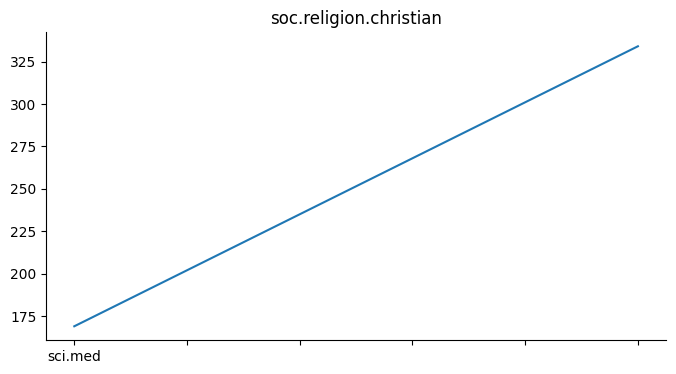

In [69]:
from matplotlib import pyplot as plt
_df_6['soc.religion.christian'].plot(kind='line', figsize=(8, 4), title='soc.religion.christian')
plt.gca().spines[['top', 'right']].set_visible(False)

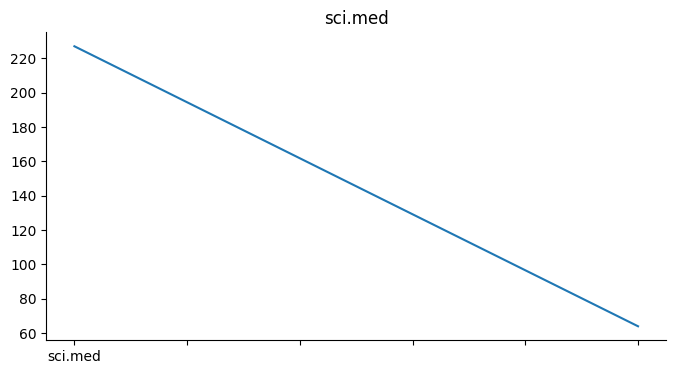

In [68]:
from matplotlib import pyplot as plt
_df_5['sci.med'].plot(kind='line', figsize=(8, 4), title='sci.med')
plt.gca().spines[['top', 'right']].set_visible(False)

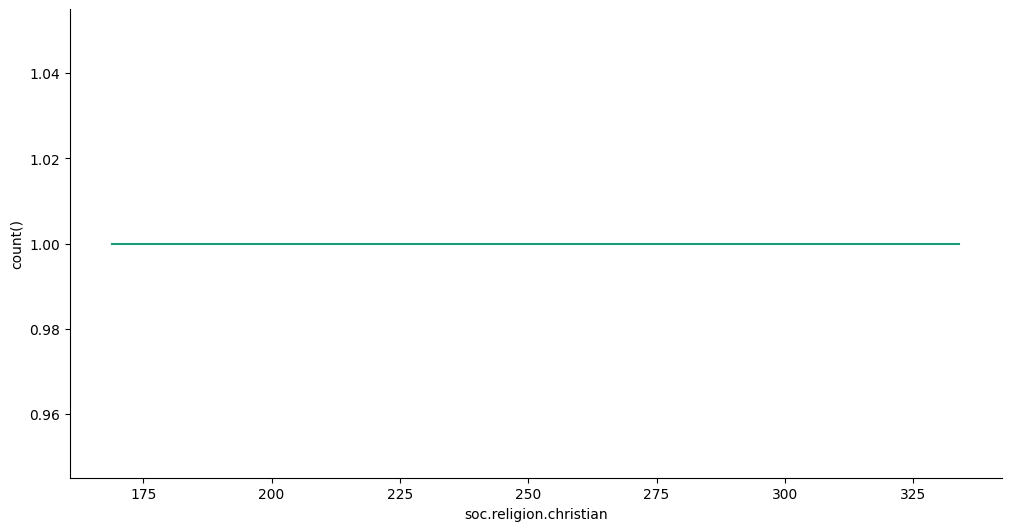

In [71]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['soc.religion.christian']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'soc.religion.christian'}, axis=1)
              .sort_values('soc.religion.christian', ascending=True))
  xs = counted['soc.religion.christian']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('soc.religion.christian', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('soc.religion.christian')
_ = plt.ylabel('count()')

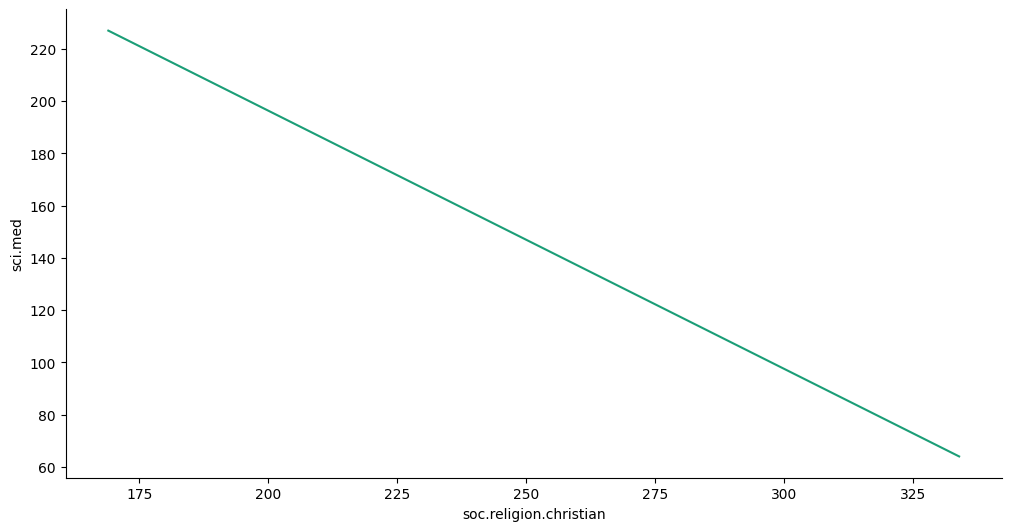

In [70]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['soc.religion.christian']
  ys = series['sci.med']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('soc.religion.christian', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('soc.religion.christian')
_ = plt.ylabel('sci.med')

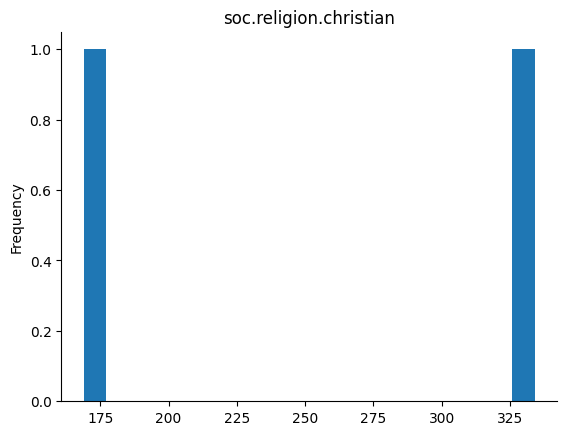

In [63]:
from matplotlib import pyplot as plt
_df_1['soc.religion.christian'].plot(kind='hist', bins=20, title='soc.religion.christian')
plt.gca().spines[['top', 'right',]].set_visible(False)

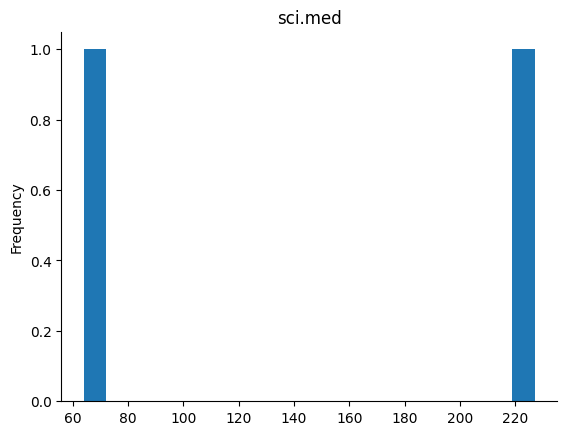

In [64]:
from matplotlib import pyplot as plt
_df_0['sci.med'].plot(kind='hist', bins=20, title='sci.med')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [54]:
# To evaluate your prediction on dev set
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(twenty_test1.target, predicted))

# Print the accuracy
print("Accuracy:", metrics.accuracy_score(twenty_test.target, predicted))

# Print the precision, recall, and F1 score for each category
print(metrics.classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names))

#  weighted average of these metrics
print("Weighted Precision:", metrics.precision_score(twenty_test.target, predicted, average='weighted'))
print("Weighted Recall:", metrics.recall_score(twenty_test.target, predicted, average='weighted'))
print("Weighted F1 Score:", metrics.f1_score(twenty_test.target, predicted, average='weighted'))

print(metrics.classification_report(twenty_test1.target, predicted, target_names=twenty_test1.target_names))

# confusion class
pd.DataFrame(metrics.confusion_matrix(twenty_test1.target, predicted),
             columns=twenty_test1.target_names,index=twenty_test1.target_names)

Accuracy: 0.7065491183879093
Accuracy: 0.7065491183879093
                        precision    recall  f1-score   support

               sci.med       0.78      0.57      0.66       396
soc.religion.christian       0.66      0.84      0.74       398

              accuracy                           0.71       794
             macro avg       0.72      0.71      0.70       794
          weighted avg       0.72      0.71      0.70       794

Weighted Precision: 0.7218961543006627
Weighted Recall: 0.7065491183879093
Weighted F1 Score: 0.7012228019145234
                        precision    recall  f1-score   support

               sci.med       0.78      0.57      0.66       396
soc.religion.christian       0.66      0.84      0.74       398

              accuracy                           0.71       794
             macro avg       0.72      0.71      0.70       794
          weighted avg       0.72      0.71      0.70       794



,sci.med,soc.religion.christian
sci.med,227,169
soc.religion.christian,64,334


from matplotlib import pyplot as plt
_df_7['sci.med'].plot(kind='hist', bins=20, title='sci.med')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['soc.religion.christian'].plot(kind='hist', bins=20, title='soc.religion.christian')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='sci.med', y='soc.religion.christian', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['soc.religion.christian']
  ys = series['sci.med']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('soc.religion.christian', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('soc.religion.christian')
_ = plt.ylabel('sci.med')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['soc.religion.christian']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'soc.religion.christian'}, axis=1)
              .sort_values('soc.religion.christian', ascending=True))
  xs = counted['soc.religion.christian']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('soc.religion.christian', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('soc.religion.christian')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['sci.med'].plot(kind='line', figsize=(8, 4), title='sci.med')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['soc.religion.christian'].plot(kind='line', figsize=(8, 4), title='soc.religion.christian')
plt.gca().spines[['top', 'right']].set_visible(False)

# Step 6: Error Analysis and Discussion
write down your own obseration about the predictions. Consider both confusion matrix and selected examples. Which classes are predicted correctly or incorrecly, possible explaination, possible solutions

Exmaple: 1) Lab Practical, which feature is helpful for female name classification. https://www.nltk.org/book/ch06.html
2) research paper: https://github.com/yoonkim/CNN_sentence


In [55]:
print(len(twenty_test.data))
print(len(twenty_test.target))
predicted = text_clf.predict(twenty_test.data)
print(len(predicted))

df_pred = pd.DataFrame({'news': twenty_test.data, 'predicted': predicted, 'true': twenty_test.target})
df_pred['correct'] = df_pred['predicted'] == df_pred['true']
incorrect_predictions = df_pred[df_pred['correct'] == False]

#df_pred = pd.DataFrame({'news':twenty_test.data,'prediction':predicted, 'true':twenty_test.target})
#df_pred[df_pred['true'] != df_pred['prediction']]

794
794
794


In [56]:
#evaluate the predictions
#creating confusion matrix anc calculating other evaluation metrics

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Assuming 'twenty_test.target' are the true labels and 'predicted' are the labels predicted by your model
cm = confusion_matrix(twenty_test.target, predicted)
cr = classification_report(twenty_test.target, predicted, target_names=twenty_test.target_names)
accuracy = accuracy_score(twenty_test.target, predicted)

# Print out the metrics
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("\nAccuracy:", accuracy)


Confusion Matrix:
 [[227 169]
 [ 64 334]]

Classification Report:
                         precision    recall  f1-score   support

               sci.med       0.78      0.57      0.66       396
soc.religion.christian       0.66      0.84      0.74       398

              accuracy                           0.71       794
             macro avg       0.72      0.71      0.70       794
          weighted avg       0.72      0.71      0.70       794


Accuracy: 0.7065491183879093


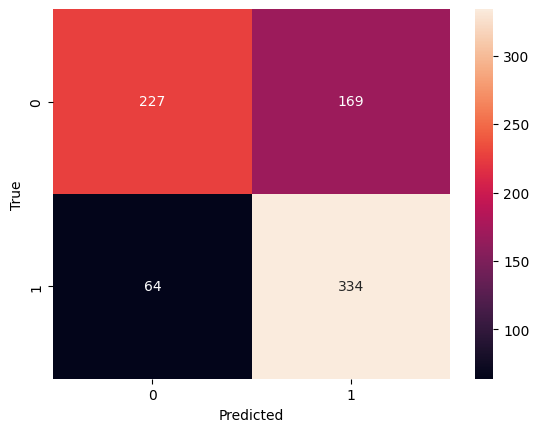

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'predicted' contains your model predictions and 'twenty_test.target' are the true labels
cm = confusion_matrix(twenty_test.target, predicted)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [58]:
import numpy as np

# Assume `twenty_test.target` are the true labels and `predicted` are your model's predictions
false_positives = np.where((predicted == 1) & (twenty_test.target == 0))[0]
false_negatives = np.where((predicted == 0) & (twenty_test.target == 1))[0]

#FALSE POSITIVE
print("Example of a false positive (Predicted as 1 but actual is 0):")
print(twenty_test.data[false_positives[0]])

Example of a false positive (Predicted as 1 but actual is 0):
From: mrbulli@btoy1.rochester.NY.US (Mr. Bulli (private account))
Subject: Re: Vasectomy: Health Effects on Women?
Reply-To: mrbulli@btoy1.rochester.NY.US
Organization: Private UUCP site
X-Newsreader: TIN [version 1.1 PL9]
Lines: 25

On 28 Apr 93 20:54:04 GMT joshm@yang.earlham.edu wrote:
: In article <1993Apr27.110440.5069@nic.csu.net>, eskagerb@nermal.santarosa.edu (Eric Skagerberg) writes:
: > Does anyone know of any studies done on the long-term health effects of a
: > man's vasectomy on his female partner?
: > 
: > ...
: I've heard of NO studies, but speculation:

: Why on _earth_ would there be any effect on women's health?  That's about 
: the most absurd idea I've heard since Ted Kaldis's claim that no more than 
: 35,000 people would march on Washington.

: Ok, _one_ point:  Greatly reduced chance of pregnancy.  But that's it.

: --Josh

Well, there might be another: Since I'm sterile my wife can enjoy sex 
without 

In [59]:
#FALSE NEGETIVE
print("Example of a false negative (Predicted as 0 but actual is 1):")
print(twenty_test.data[false_negatives[0]])


Example of a false negative (Predicted as 0 but actual is 1):
From: Eugene.Bigelow@ebay.sun.com (Geno )
Subject: Re: SJ Mercury's reference to Fundamentali
Reply-To: Eugene.Bigelow@ebay.sun.com
Organization: Sun Microsystems, Inc.
Lines: 18

In article <May.11.02.37.07.1993.28120@athos.rutgers.edu>, dan@ingres.com (a Rose arose) writes:
|> 	"Raised in Oakland and San Lorenzo by strict fundamentalist
|> 	Christian parents, Mason was beaten as a child.  ...

|> Were the San Jose Mercury news to come out with an article starting with
|> "Raised in Oakland by Mexican parents, Mason was beaten...", my face would

>Perhaps because there is a connection here that is not there in the Mexican
>variant you bring up.

This is true. The statement didn't say anything about Christians in general.
It specifically said "strict fundamentalist" Christians. It reflects a
common perception that people have about fundamentalists being strict
disciplinarians. Whether or not this perception is justified is a

In [61]:
# Display examples of CORRECT predictions
correct_indices = [i for i, (true, pred) in enumerate(zip(twenty_test.target, predicted)) if true == pred]
incorrect_indices = [i for i, (true, pred) in enumerate(zip(twenty_test.target, predicted)) if true != pred]

print("Correctly predicted examples:")
for i in correct_indices[:5]:  # Display first 5 correct predictions
    print(f"News: {twenty_test.data[i]}")
    print(f"Predicted: {twenty_test.target_names[predicted[i]]}, Actual: {twenty_test.target_names[twenty_test.target[i]]}\n")

Correctly predicted examples:
News: From: sun075!Gerry.Palo@uunet.uu.net (Gerry Palo)
Subject: Re: Portland earthquake
Lines: 68

Austin C Archer (archau@saturn.wwc.edu) wrote:
>
>I am interested in views about the non-event of May 3. Seriously, how can a 
>Christian discriminate between "messages from God" which are to be taken 
>seriously, and those which are spurious?  Is there a useful heuristic which 
>would help us avoid embracing messages which, by their non-fulfillment are 
>proven to be false, thus causing the name of Christ to be placed in 
>disrepute? Is this a problem at all?

It is possible that the individual saw a true prophetic vision, but that he
interpreted the scale of time and space according to his material con-
sciousness, translating the supersensible perceptions of a plane above
that of time and space into an immediate worldly context -- and getting it
wrong.  Not that he did it rationally, but rather that unconsciously the
perceptions became clothed in material

In [75]:
#Incorrect Predicted Example

print("Incorrectly predicted examples:")
for i in incorrect_indices[:5]:  # Display first 5 incorrect predictions
    print(f"News: {twenty_test.data[i]}")
    print(f"Predicted: {twenty_test.target_names[predicted[i]]}, Actual: {twenty_test.target_names[twenty_test.target[i]]}\n")

Incorrectly predicted examples:
News: From: Eugene.Bigelow@ebay.sun.com (Geno )
Subject: Re: SJ Mercury's reference to Fundamentali
Reply-To: Eugene.Bigelow@ebay.sun.com
Organization: Sun Microsystems, Inc.
Lines: 18

In article <May.11.02.37.07.1993.28120@athos.rutgers.edu>, dan@ingres.com (a Rose arose) writes:
|> 	"Raised in Oakland and San Lorenzo by strict fundamentalist
|> 	Christian parents, Mason was beaten as a child.  ...

|> Were the San Jose Mercury news to come out with an article starting with
|> "Raised in Oakland by Mexican parents, Mason was beaten...", my face would

>Perhaps because there is a connection here that is not there in the Mexican
>variant you bring up.

This is true. The statement didn't say anything about Christians in general.
It specifically said "strict fundamentalist" Christians. It reflects a
common perception that people have about fundamentalists being strict
disciplinarians. Whether or not this perception is justified is another issue.


[The oth

#References:  

https://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html

https://www.nltk.org/book/ch06.html

search: Other online resources:

https://towardsdatascience.com/setting-up-text-preprocessing-pipeline-using-scikit-learn-and-spacy-e09b9b76758f

sentiment analysis scikit learn

scikit learn or nltk + NLP techniques

python + NLP techniques

scikit learn logistic regression


